# LIBRARIES

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [ ]:
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


# LOAD DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/MACHINE LEARNING/TENSORFLOW BOOTCAMP/DATASET/breast_cancer_winconsin.csv')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# DATA CLEANING

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

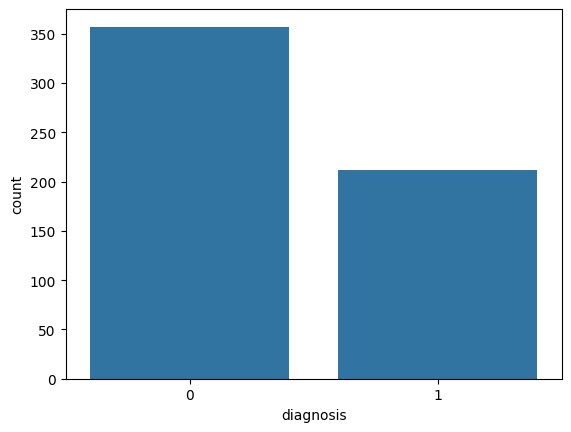

In [ ]:
sns.countplot(x = 'diagnosis', data = df)

<Axes: >

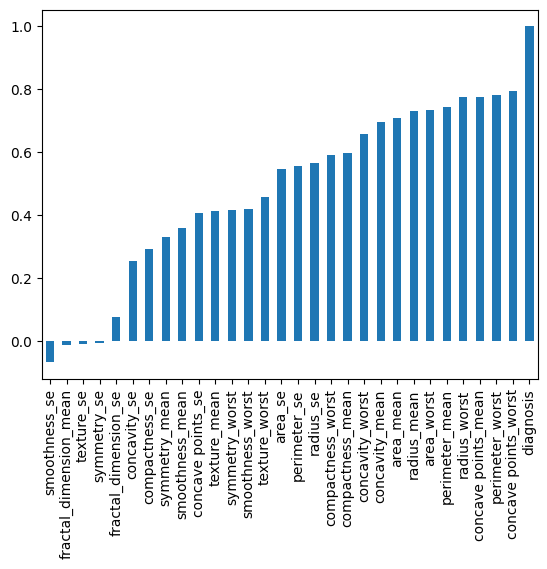

In [ ]:
df.corr()['diagnosis'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

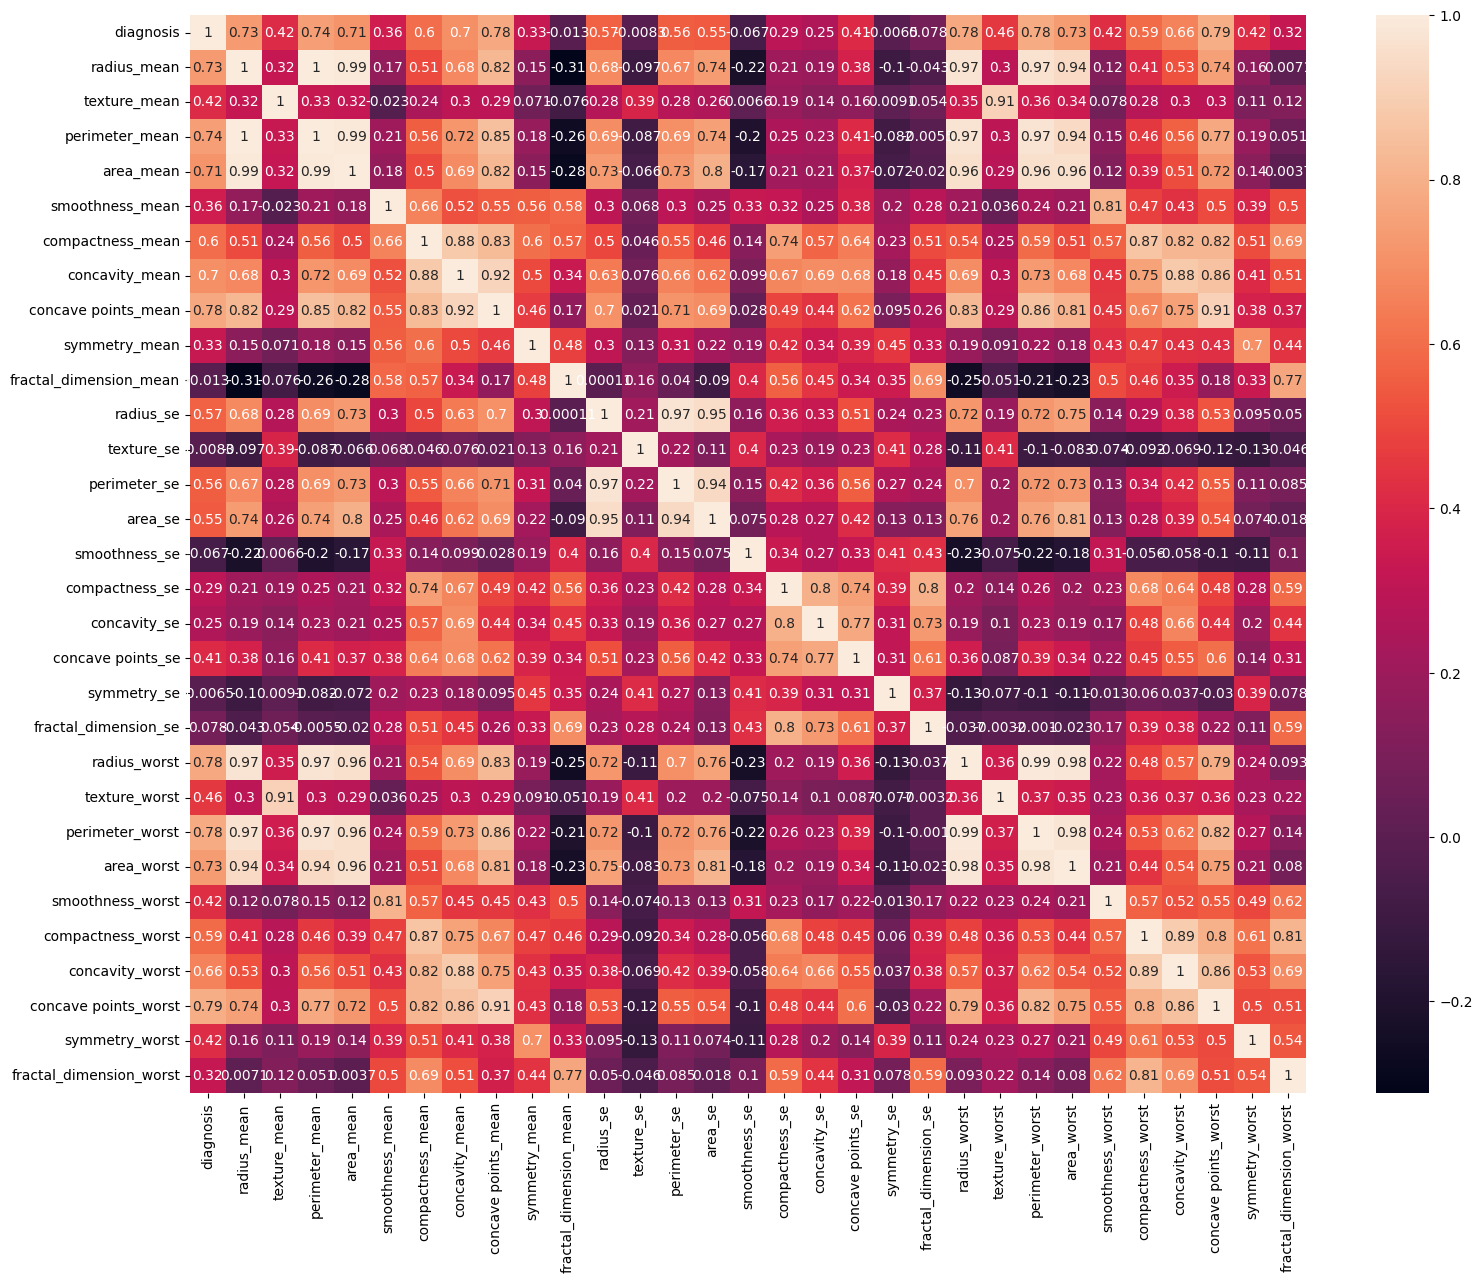

In [ ]:
plt.figure(figsize = (18,14))
sns.heatmap(df.corr(), annot = True)

# MODEL TRAINING BY USING NEURAL NETWORK ONLY USING DENSE LAYERS

## THEORY

### Sequential Model in Keras

#### What is Sequential?
The `Sequential` class in Keras is a linear stack of layers, meaning that you can only add layers to it one after the other. It's the simplest model in Keras and is used for building a model layer-by-layer.

#### When and Why to Use Sequential
**When to Use:**
- When you need a simple model that has a single input and output.
- When your model can be built by stacking layers sequentially.

**Why to Use:**
- Simplicity: Easy to build and understand.
- Suitable for many standard neural network architectures, like simple feedforward networks, CNNs, and RNNs when layers are stacked linearly.

**Pros:**
- Straightforward and easy to implement.
- Great for simple to moderately complex models.
- Facilitates a quick prototype of neural networks.

**Cons:**
- Lack of flexibility: Not suitable for models that require multiple inputs or outputs, or non-linear layer connectivity.
- Limited to single-input, single-output stacks of layers.

### Dense Layer in Keras

#### What is Dense?
A `Dense` layer is a regular deeply connected neural network layer. It is most commonly used in feedforward neural networks. Each neuron in a dense layer receives input from all neurons in the previous layer, making it a fully connected layer.

#### Methods and Uses
**Methods:**
- `__init__()`: Initializes the layer with parameters like the number of units (neurons), activation function, etc.
- `call()`: Defines the computation from inputs to outputs.
- `build()`: Creates the weights of the layer.
- `get_config()`: Returns the configuration of the layer, useful for saving and loading models.

**Uses:**
- Adding complexity to the model by increasing the number of neurons.
- Transforming input dimensions into output dimensions.
- Applying activation functions to introduce non-linearity.

#### Example Usage
```python
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # 128 neurons, ReLU activation
model.add(Dense(10, activation='softmax'))  # 10 output neurons for classification
```

**Pros:**
- Fully connected nature allows for learning complex representations.
- Versatile and can be used in various parts of neural network architectures.

**Cons:**
- Can lead to overfitting if not regularized properly due to high capacity.
- Computationally expensive and memory intensive for large input sizes.

### Dropout Layer in Keras

#### What is Dropout?
`Dropout` is a regularization technique where randomly selected neurons are ignored during training. They are "dropped out" randomly, meaning their contribution to the activation of downstream neurons is temporarily removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

#### When and Why to Use Dropout
**When to Use:**
- When you are experiencing overfitting.
- When you need to regularize your model without adding too much computational complexity.

**Why to Use:**
- Prevents overfitting by reducing the reliance on specific neurons and forcing the network to generalize better.
- Provides a form of ensemble learning by creating different subnetworks during training.

**Pros:**
- Effective in reducing overfitting.
- Simple to implement and understand.
- Can be applied to various types of layers, not just dense layers.

**Cons:**
- Slows down the training process.
- Increases the number of iterations needed to converge.
- Can lead to underfitting if used excessively.

#### Example Usage
```python
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))  # 50% dropout rate
model.add(Dense(10, activation='softmax'))
```

**Purpose:**
- The primary purpose of dropout is to prevent overfitting. It achieves this by introducing noise into the training process, thereby forcing the network to learn more robust features that generalize better to new data.

### Summary
- **Sequential Model**: Simple and effective for linear stack models; limited flexibility.
- **Dense Layer**: Adds complexity and non-linearity to models; prone to overfitting without proper regularization.
- **Dropout Layer**: Prevents overfitting by randomly ignoring neurons during training; can slow down training and lead to underfitting if overused.

These layers, when used appropriately, help in building powerful neural network models that can generalize well to unseen data.

## _

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
x = df.drop(['diagnosis'], axis = 1)
y = df.diagnosis

In [ ]:
xtrain , xtest , ytrain, ytest = train_test_split(x,y,test_size = 0.25 , random_state = 42, shuffle = True)

In [ ]:
xtrain.shape

(426, 30)

In [ ]:
scale = MinMaxScaler()

In [ ]:
xtrain = scale.fit_transform(xtrain)
xtest = scale.transform(xtest)

In [ ]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # for binary classification

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain , epochs = 400, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/400
14/14 [==============================] - 1s 22ms/step - loss: 0.6774 - accuracy: 0.7042 - val_loss: 0.6500 - val_accuracy: 0.8601
Epoch 2/400
14/14 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.8521 - val_loss: 0.6009 - val_accuracy: 0.8531
Epoch 3/400
14/14 [==============================] - 0s 6ms/step - loss: 0.5904 - accuracy: 0.8568 - val_loss: 0.5507 - val_accuracy: 0.9231
Epoch 4/400
14/14 [==============================] - 0s 6ms/step - loss: 0.5450 - accuracy: 0.8709 - val_loss: 0.4967 - val_accuracy: 0.9301
Epoch 5/400
14/14 [==============================] - 0s 6ms/step - loss: 0.4976 - accuracy: 0.8944 - val_loss: 0.4405 - val_accuracy: 0.9510
Epoch 6/400
14/14 [==============================] - 0s 7ms/step - loss: 0.4419 - accuracy: 0.9061 - val_loss: 0.3827 - val_accuracy: 0.9441
Epoch 7/400
14/14 [==============================] - 0s 7ms/step - loss: 0.3926 - accuracy: 0.8991 - val_loss: 0.3294 - val_accuracy: 0.9441
Epoch 8/400


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

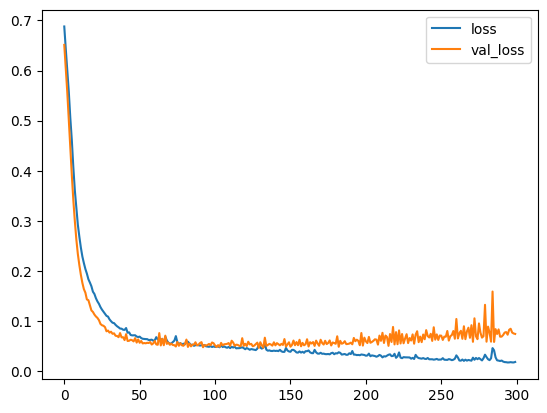

In [ ]:
loss_data.plot()

5/5 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9650
Test accuracy (from model.evaluate()): 0.9650
5/5 [==============================] - 0s 4ms/step
Calculated accuracy (from accuracy_score()): 0.9650
Confusion Matrix:


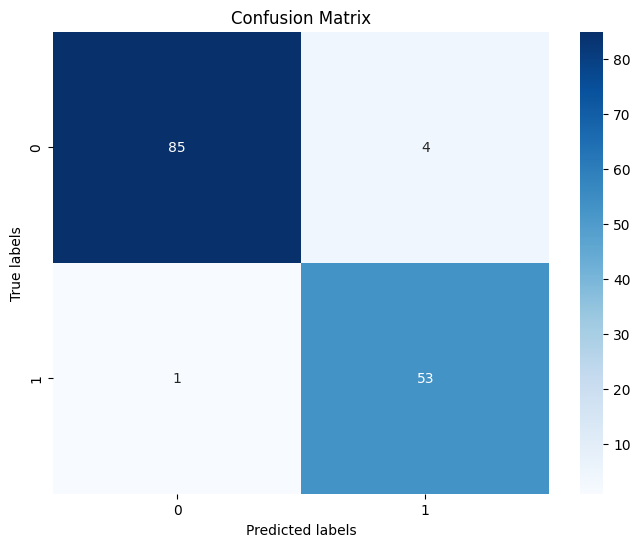

In [ ]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test accuracy (from model.evaluate()): {accuracy:.4f}')


y_pred_probs = model.predict(xtest)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Compute accuracy using accuracy_score
accuracy = accuracy_score(ytest, y_pred_labels)
print(f'Calculated accuracy (from accuracy_score()): {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred_labels)

print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# MODEL TRAINING BY USING NEURAL NETWORK WITH DENSE LAYER AND USING EARLY STOPPING

## THEORY

### EarlyStopping Callback in Keras

#### What is EarlyStopping?
The `EarlyStopping` callback in Keras is a technique to stop training when a monitored metric has stopped improving. This helps to avoid overfitting and unnecessary training time by stopping the training process once the performance metric of the model ceases to improve on the validation set.

#### When and Why to Use EarlyStopping
**When to Use:**
- When training a neural network and you observe that after a certain point, the model's performance on the validation set stops improving and may start to degrade (overfitting).
- When you want to save time and computational resources by stopping the training process early if it is no longer yielding better results.

**Why to Use:**
- To prevent overfitting: By stopping training when the model's performance on a validation set begins to degrade, you can prevent the model from becoming too tailored to the training data.
- To save resources: Training neural networks can be time-consuming and resource-intensive. EarlyStopping can help conserve computational resources by halting the training process once the model has reached its optimal performance.
- To find the optimal number of epochs: Automatically determine when the model stops learning, helping to find the best number of epochs for training without manually experimenting with different values.

#### How EarlyStopping Works
EarlyStopping monitors a specific metric (such as validation loss or accuracy) during training. When the metric stops improving for a specified number of epochs (patience), training is halted.

**Key Parameters:**
- `monitor`: The metric to monitor (e.g., 'val_loss', 'val_accuracy'). Defaults to 'val_loss'.
- `patience`: Number of epochs with no improvement after which training will be stopped. This is useful to prevent stopping too early.
- `min_delta`: Minimum change in the monitored quantity to qualify as an improvement, i.e., an absolute change of less than `min_delta` will count as no improvement.
- `mode`: One of {'auto', 'min', 'max'}. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode, it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
- `restore_best_weights`: Whether to restore model weights from the epoch with the best value of the monitored metric. If `False`, the model weights obtained at the last step of training are used.

#### Example Usage
```python
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to monitor
    patience=5,             # Number of epochs with no improvement
    min_delta=0.001,        # Minimum change to qualify as improvement
    mode='min',             # Trainig stops when 'val_loss' has stopped decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best 'val_loss'
)

# Train the model with EarlyStopping
history = model.fit(
    x_train, y_train,       # Training data
    validation_data=(x_val, y_val),  # Validation data
    epochs=100,             # Maximum number of epochs
    callbacks=[early_stopping]  # List of callbacks to apply during training
)
```

#### Detailed Explanation of Parameters

- **monitor**: This parameter sets the metric to observe during training. Common choices include 'val_loss' for validation loss and 'val_accuracy' for validation accuracy. Choosing the right metric is crucial as it determines when to stop the training.

- **patience**: This defines the number of epochs to wait for an improvement before stopping the training. A higher patience allows the model more opportunities to improve, while a lower patience may stop training too early.

- **min_delta**: This parameter sets the minimum threshold for an improvement to be considered significant. For example, if `min_delta` is set to 0.001, any improvement less than this will be ignored. This helps in ignoring minor fluctuations and focusing on more substantial improvements.

- **mode**: This parameter defines whether the metric should be minimized or maximized. For metrics like loss, 'min' is appropriate, while for accuracy, 'max' is suitable. The 'auto' mode infers this automatically based on the name of the monitored metric.

- **restore_best_weights**: When set to `True`, the model will revert to the weights of the epoch with the best monitored metric value after training stops. This ensures that the model retains its best performance rather than the performance from the final epoch.

#### Pros and Cons of EarlyStopping
**Pros:**
- Prevents overfitting by stopping training at the optimal point.
- Saves computational resources by avoiding unnecessary epochs.
- Helps in automatically determining the optimal number of epochs.

**Cons:**
- Choosing the right patience and min_delta values can be tricky and might require some experimentation.
- If set too aggressively, it can stop training too early, leading to underfitting.
- Might not be as effective if the validation metric is noisy, as it can trigger early stopping prematurely.

### Summary
The `EarlyStopping` callback in Keras is a powerful tool to improve the efficiency and generalizability of neural network training. By monitoring a specific performance metric and halting training when improvements cease, it helps prevent overfitting and conserves computational resources. Properly configuring its parameters, such as `monitor`, `patience`, `min_delta`, `mode`, and `restore_best_weights`, is essential for maximizing its benefits.

## _

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # for binary classification

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain , epochs = 300, batch_size = 32, validation_data = (xtest, ytest), callbacks = [early_stop])

Epoch 1/300
14/14 [==============================] - 1s 19ms/step - loss: 0.7059 - accuracy: 0.6291 - val_loss: 0.6809 - val_accuracy: 0.6224
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.6315 - val_loss: 0.6461 - val_accuracy: 0.6993
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6387 - accuracy: 0.7582 - val_loss: 0.6109 - val_accuracy: 0.8182
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 0.6026 - accuracy: 0.8216 - val_loss: 0.5627 - val_accuracy: 0.8462
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.8474 - val_loss: 0.5077 - val_accuracy: 0.9161
Epoch 6/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8709 - val_loss: 0.4502 - val_accuracy: 0.9301
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.8944 - val_loss: 0.3971 - val_accuracy: 0.9510
Epoch 8/300


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

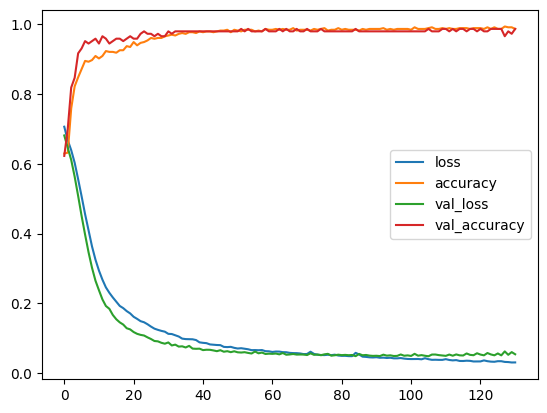

In [ ]:
losses.plot()

5/5 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 0.9860
Test accuracy (from model.evaluate()): 0.9860
5/5 [==============================] - 0s 3ms/step
Calculated accuracy (from accuracy_score()): 0.9860
Confusion Matrix:


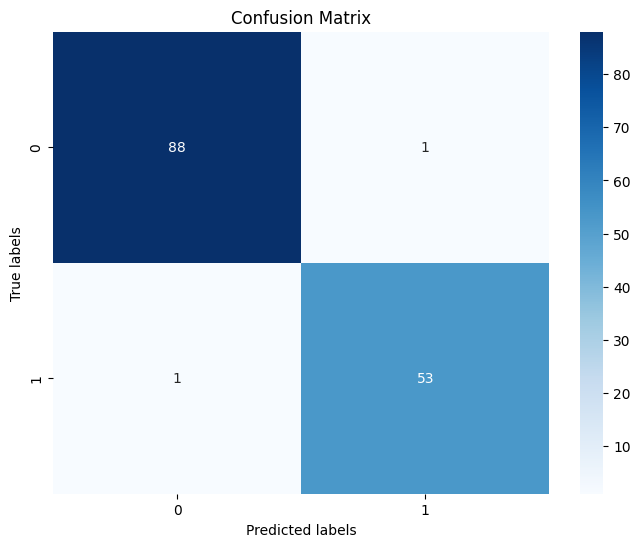

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test accuracy (from model.evaluate()): {accuracy:.4f}')


y_pred_probs = model.predict(xtest)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Compute accuracy using accuracy_score
accuracy = accuracy_score(ytest, y_pred_labels)
print(f'Calculated accuracy (from accuracy_score()): {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred_labels)

print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# MODEL TRAINING USING NEURAL NETWORK WITH DENSE LAYER AND USING DROPOUT LAYERS

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))
# for binary classification
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(xtrain, ytrain , epochs = 300, batch_size = 32, validation_data = (xtest, ytest), callbacks = [early_stop])

Epoch 1/300
14/14 [==============================] - 1s 21ms/step - loss: 0.6844 - accuracy: 0.5305 - val_loss: 0.6379 - val_accuracy: 0.7832
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.6221 - val_loss: 0.6158 - val_accuracy: 0.8462
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6549 - val_loss: 0.5991 - val_accuracy: 0.8322
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6294 - accuracy: 0.6831 - val_loss: 0.5837 - val_accuracy: 0.8042
Epoch 5/300
14/14 [==============================] - 0s 8ms/step - loss: 0.6336 - accuracy: 0.6620 - val_loss: 0.5665 - val_accuracy: 0.8741
Epoch 6/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6131 - accuracy: 0.7066 - val_loss: 0.5523 - val_accuracy: 0.8741
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.7465 - val_loss: 0.5340 - val_accuracy: 0.8811
Epoch 8/300


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

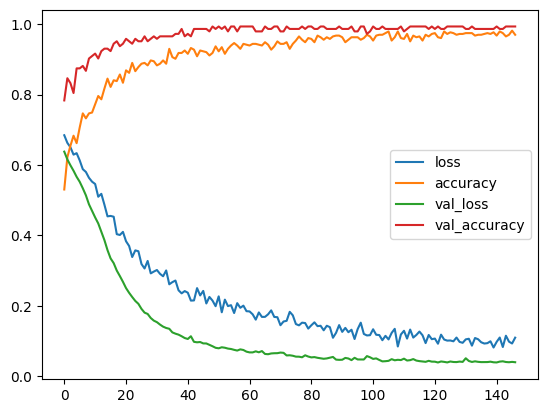

In [ ]:
losses.plot()

5/5 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9930
Test accuracy (from model.evaluate()): 0.9930
5/5 [==============================] - 0s 3ms/step
Calculated accuracy (from accuracy_score()): 0.9930
Confusion Matrix:


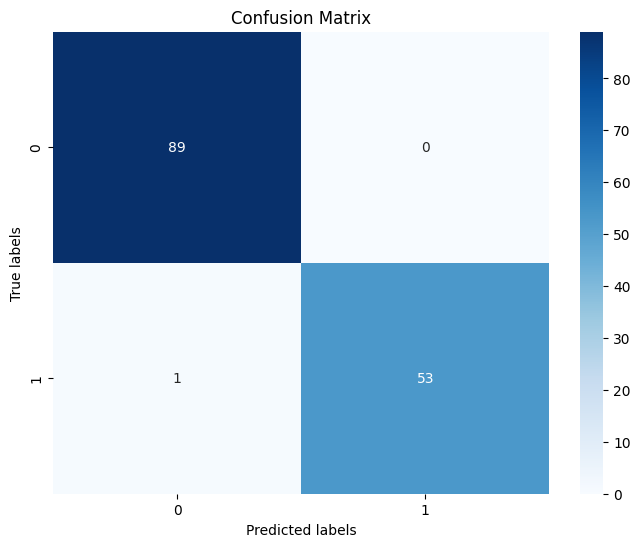

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test accuracy (from model.evaluate()): {accuracy:.4f}')


y_pred_probs = model.predict(xtest)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Compute accuracy using accuracy_score
accuracy = accuracy_score(ytest, y_pred_labels)
print(f'Calculated accuracy (from accuracy_score()): {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred_labels)

print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# MODEL TRAINING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier()

Calculated accuracy (from accuracy_score()): 0.9720
Confusion Matrix:


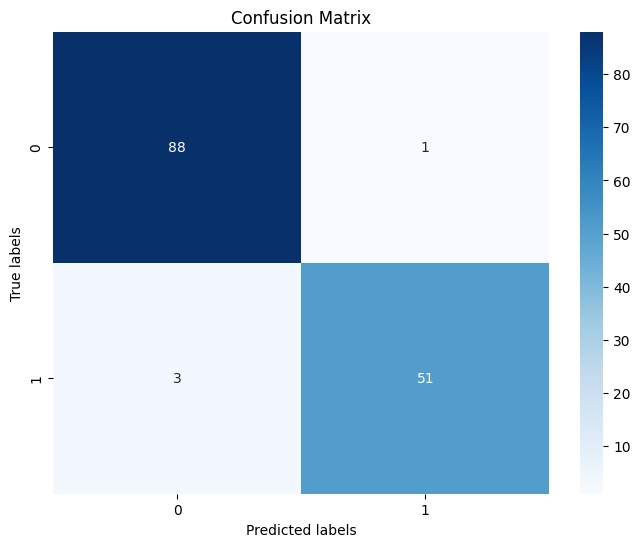

In [ ]:
y_pred_probs = model.predict(xtest)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Compute accuracy using accuracy_score
accuracy = accuracy_score(ytest, y_pred_labels)
print(f'Calculated accuracy (from accuracy_score()): {accuracy:.4f}')

conf_matrix = confusion_matrix(ytest, y_pred_labels)

print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()